# Aula 19 - Introdução ao Aprendizado Não Supervisionado: Agrupamento

Nesta aula vamos estudar o uso de algoritmos de **Aprendizado de Máquina Não Supervisionado**. Focaremos nos algoritmos utilizados para **agrupamento**, que é a tarefa de predizer grupos de saída (dados categóricos) para conjuntos de dados de entrada (numéricos ou transformados em numéricos) sem saber, a princípio, a saída correta.

Existem muitos algoritmos para se realizar essa tarefa, entre eles:
- K-means
- DBSCAN
- Cluster Hierarquico
- Mistura Gaussiana
- Redes Neurais (Self Organizing Map - SOM)

Cada uma dessas técnicas tem uma forte base matemática e conceitual. Os algoritmos foram propostos ao longo de diversas décadas e possuem diferentes cenários de aplicações. Não teremos tempo de ver cada um deles a fundo, nem mesmo todos eles. Iremos nos focar nos procedimentos básicos para se utilizar esses algoritmos.

Esses algoritmos podem ser aplicados para diferentes problemas que envolvam segmentação/agrupamento de dados.

Em geral, o desempenho deles é menor do que aqueles obtidos com Classificadores (técnica supervisionada). Entretanto, as técnicas de agrupamento apresentam a vantagem de não precisarem de dados rotulados (label).

### Bibliotecas utilizadas

In [1]:
import pandas as pd

# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns
import scipy.cluster.hierarchy as sch   # Dendograma


# Algoritmos de Agrupamento
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Avaliacao de desemepnho
from sklearn.metrics import adjusted_rand_score, silhouette_score

## Exemplo 1

    
### Moons

Reinaldo Sanchez-Arias, Assistant Professor of Data Science, Florida Polytechnic University, https://raw.githubusercontent.com/reisanar/datasets/master/moons.csv

### Carregando os dados

In [2]:
url_bd = 'https://raw.githubusercontent.com/reisanar/datasets/master/moons.csv'
moons = pd.read_csv(url_bd)

In [3]:
moons.head()

,X,Y
0,-0.415208,1.035735
1,0.058781,0.304334
2,1.109379,-0.509738
3,1.540948,-0.427550
4,0.929095,-0.532388


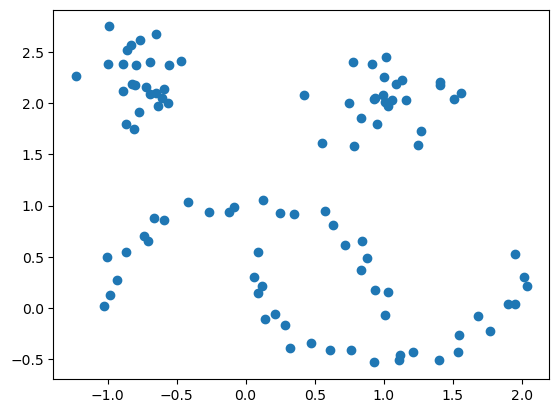

In [4]:
# Gráfico de DISPERSÃO
plt.scatter(x=moons['X'], y=moons['Y'])

### Criação do Modelos de Agrupamento

In [5]:
# Modelos de agrupamento
rs=42
km = KMeans(n_clusters=4, random_state=rs)            # KNN k=4
gm = GaussianMixture(n_components=4, random_state=rs) # Gaussian Mixture k=4
db = DBSCAN(eps=0.4)

In [6]:
# aplica o algoritmo e armazena o cluster de cada dado
km_c = km.fit_predict(moons)  # 
gm_c = gm.fit_predict(moons)  # Permite mistura entre grupos (bem parecido com k-means)
db_c = db.fit_predict(moons)  # Permite formatos não globulares

In [7]:
km_c

array([1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3])

In [8]:
db_c

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2,
       3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3,
       2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3], dtype=int64)

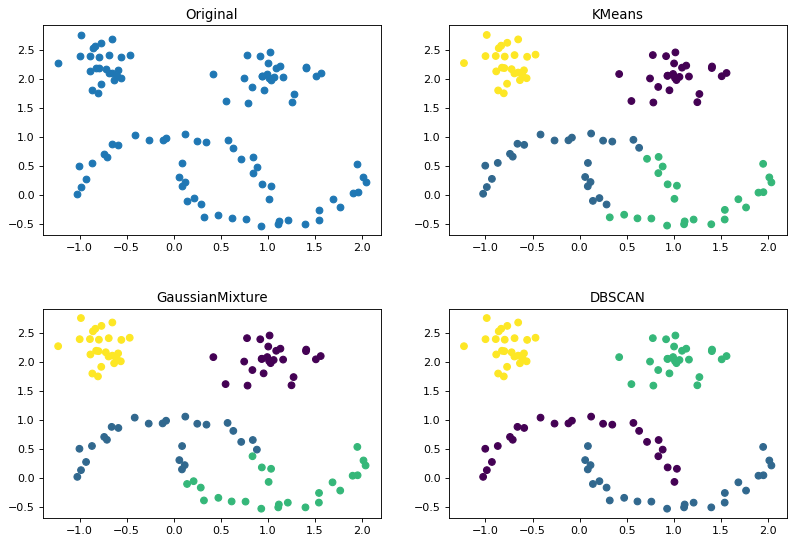

In [13]:
fig = plt.figure(figsize=(12, 8), dpi=80)
plt.subplot(2,2,1)
plt.scatter(x=moons['X'], y=moons['Y'])
plt.title('Original')
plt.subplot(2,2,2)
plt.scatter(x=moons['X'], y=moons['Y'], c=km_c)
plt.title('KMeans')
plt.subplot(2,2,3)
plt.scatter(x=moons['X'], y=moons['Y'], c=gm_c)
plt.title('GaussianMixture')
plt.subplot(2,2,4)
plt.scatter(x=moons['X'], y=moons['Y'], c=db_c)
plt.title('DBSCAN')
plt.subplots_adjust(hspace = 0.35)

--------------------------

## Exemplo 2 - Grupo de Consumidores

Esse conjunto de dados ilustra alguns dados dos consumidores de um shopping. **Será que podemos encontrar grupos de consumidores com os dados acima?**

In [14]:
dados = pd.read_csv("mall.csv", sep=',')

In [15]:
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Analisando os dados
A seguir vamos analisar os tipos de dados que temos.

In [16]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
dados.shape

(200, 5)

In [18]:
dados.isnull().sum() # Ver se tem dados nulos (células vazias)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

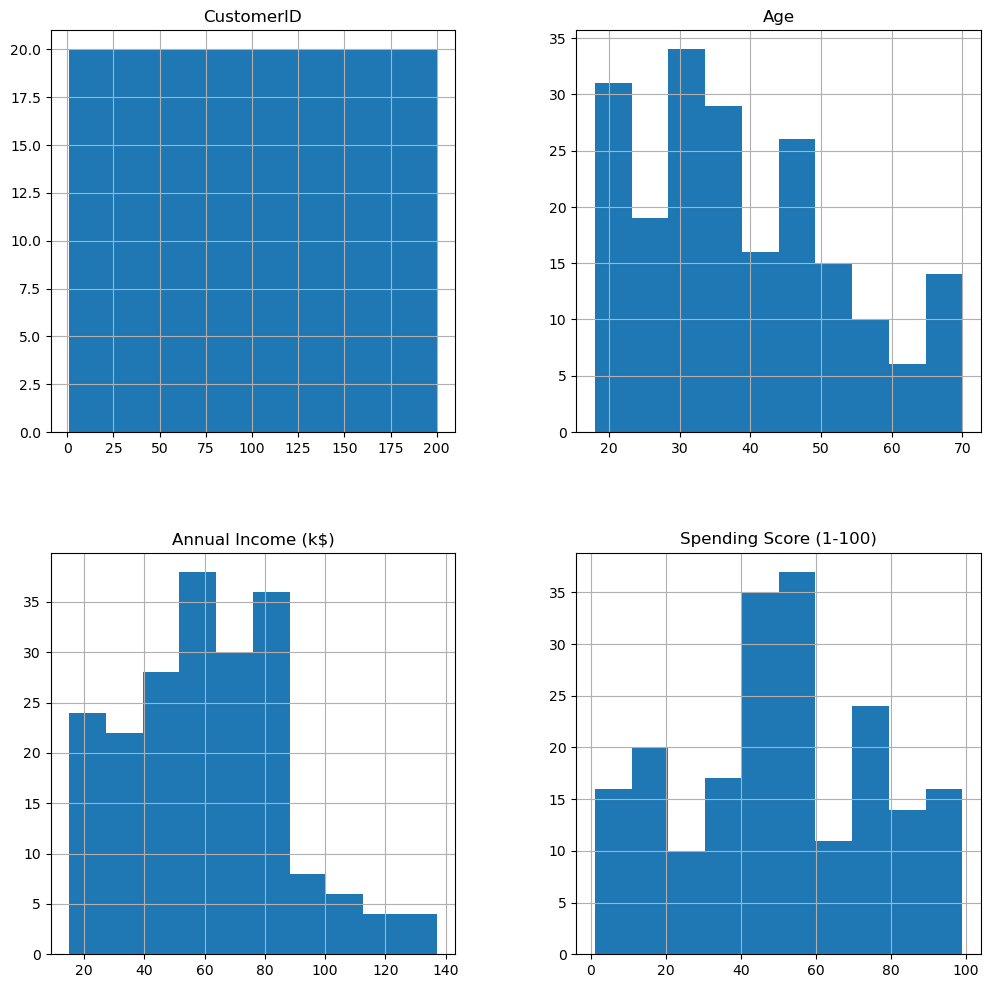

In [20]:
dados.hist(figsize=(12,12))

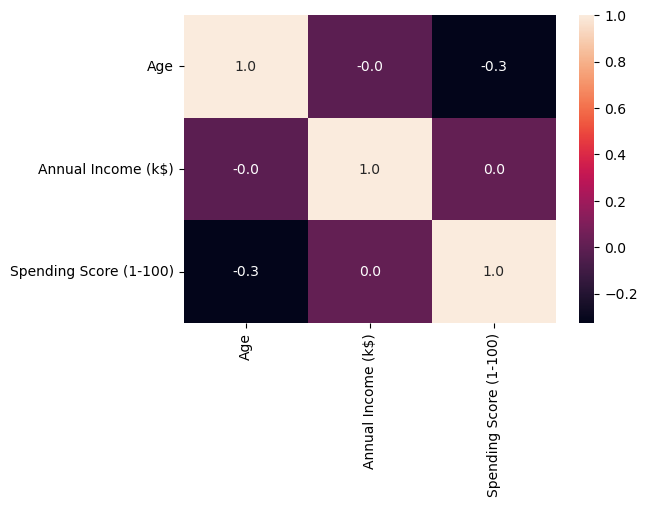

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(dados[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(method = 'pearson'),
            annot=True, fmt=".1f");

In [22]:
dados['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Boa proporção entre os generos que temos disponíveis em nossos dados.

Vamos fazer um gráfico completo com todos os dados para checarmos possíveis agrupamentos que podem ser realizados.

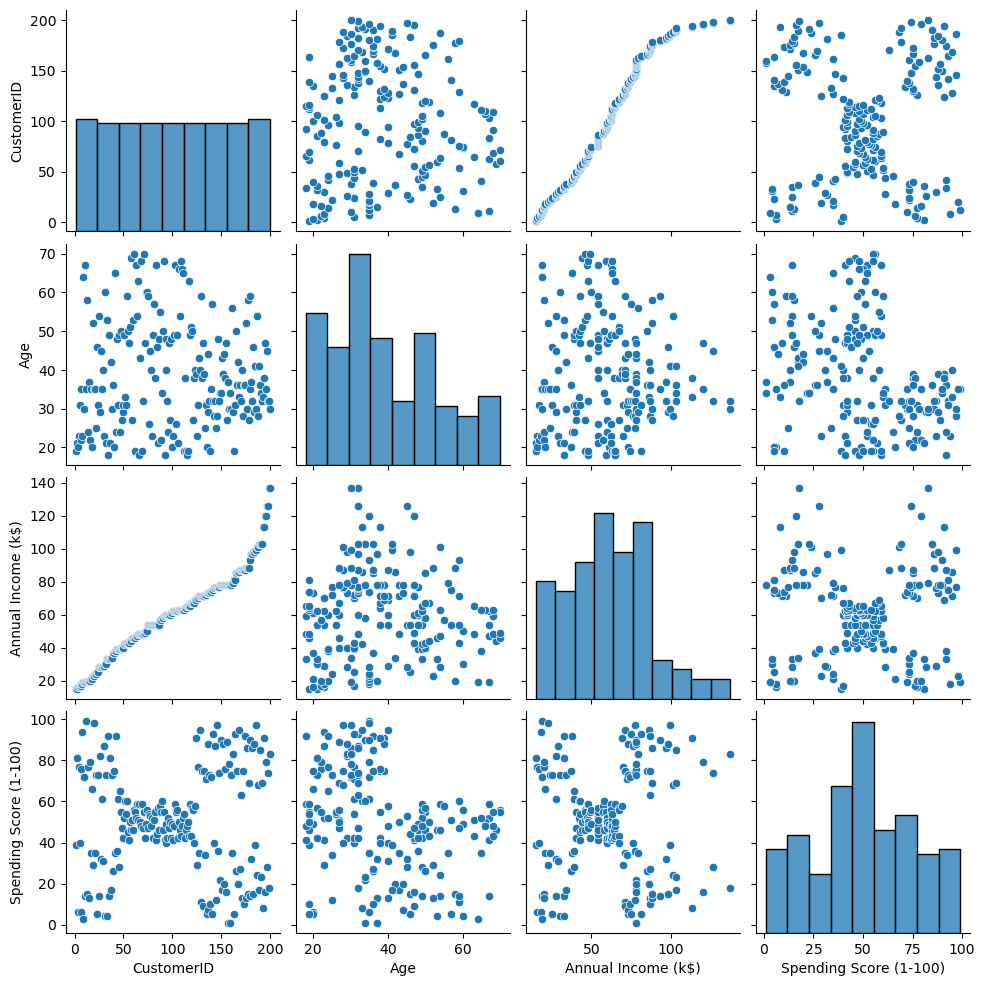

In [23]:
sns.pairplot(dados)
plt.show()

Aparentemente o Annual Income e o Spending Score permitem alguns agrupamentos dos nossos dados. 

Podemos trabalhar com eles.

### Criando os agrupamentos
Vamos criar agrupamentos com diferentes metodologias:

### 1 - K-Means

In [24]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans = KMeans(n_clusters=6,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

Vamos analisar a nossa previsao e os centroides:

In [25]:
pd.Series(kmeans_labels).value_counts()

1    81
0    35
5    28
4    23
3    22
2    11
dtype: int64

In [26]:
centroides

array([[ 88.2       ,  17.11428571],
       [ 55.2962963 ,  49.51851852],
       [108.18181818,  82.72727273],
       [ 25.72727273,  79.36363636],
       [ 26.30434783,  20.91304348],
       [ 78.03571429,  81.89285714]])

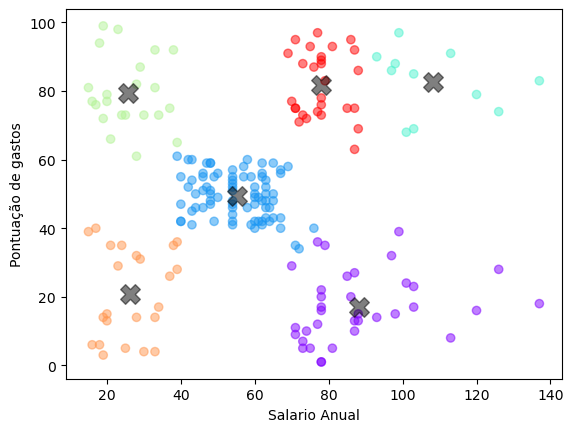

In [27]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

Escolhendo a quantidade de grupos usando o método do "cotovelo":

In [28]:
# Lista com a quantidade de clusters que iremos testar
k = list(range(1, 10))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


D:\arthu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


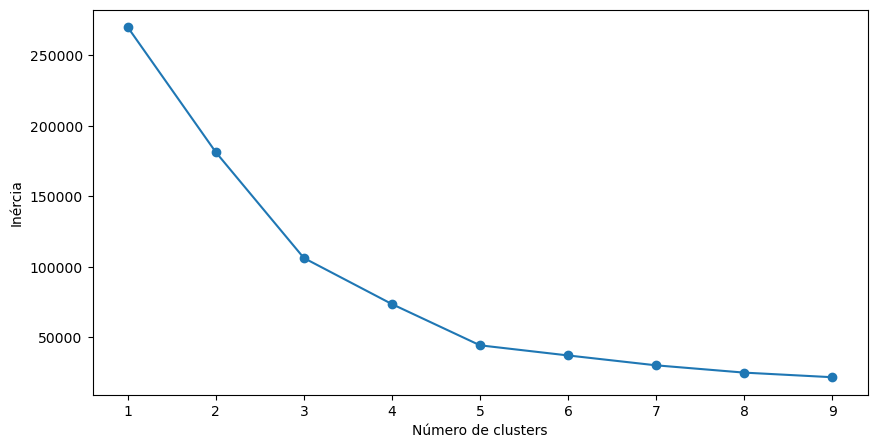

In [29]:
# Armazena o SSE (soma dos erros quadraticos) para cada quantidade de k
sse = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (10, 5)
# Plota o gráfico com a soma dos erros quadraticos
plt.plot(k, sse, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

Podemos notar que após 3 ou 5 clusters a soma do erro quadratico tem uma redução na forma com a qual a função está decrescendo. Assim podemos adotar 5 clusters. Checando os resultados para 5 clusters:

In [30]:
# Definindo o modelo de clusterizacao. K-MEANS com 5 clusters
kmeans = KMeans(n_clusters=5,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

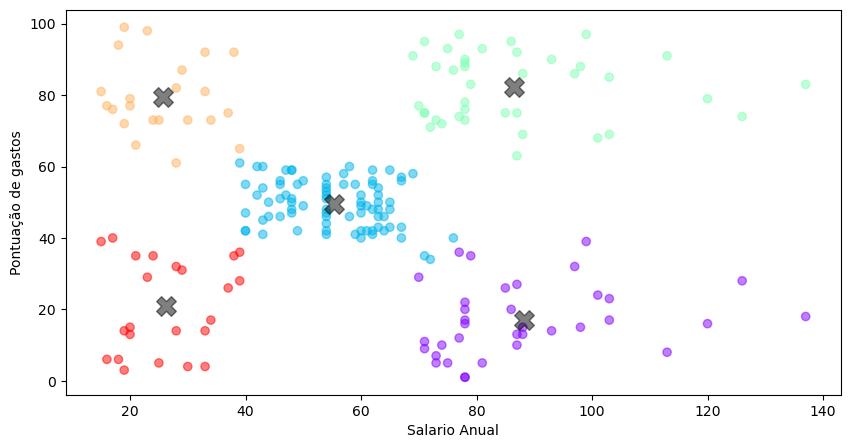

In [31]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

In [32]:
dados['grupos kmeas'] = kmeans_labels

In [33]:
dados_2 = dados[dados['grupos kmeas'] == 2]

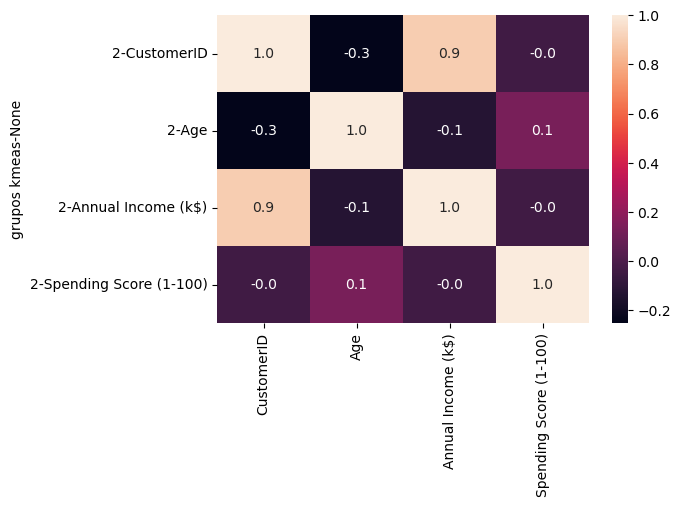

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(dados_2.groupby('grupos kmeas').corr(method = 'pearson'),
            annot=True, fmt=".1f");

### 2 - DBSCAN

In [ ]:
#Criando o modelo:
dbscan = DBSCAN(eps=10, min_samples=8)
#Ajustando aos dados
dbscan.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

dbscan_labels = dbscan.labels_
dbscan_labels

Labels com -1 foram classificados como outliers

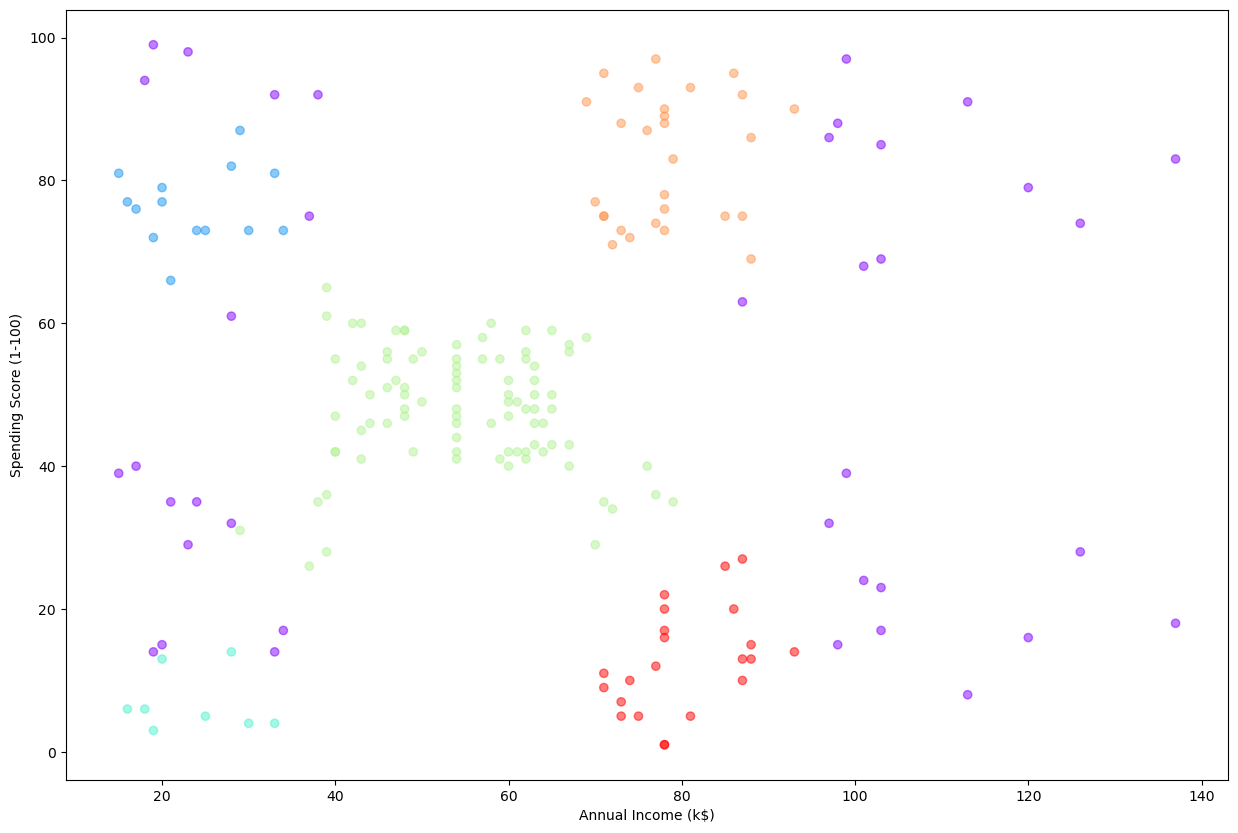

In [36]:
#Plotando o grafico:
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

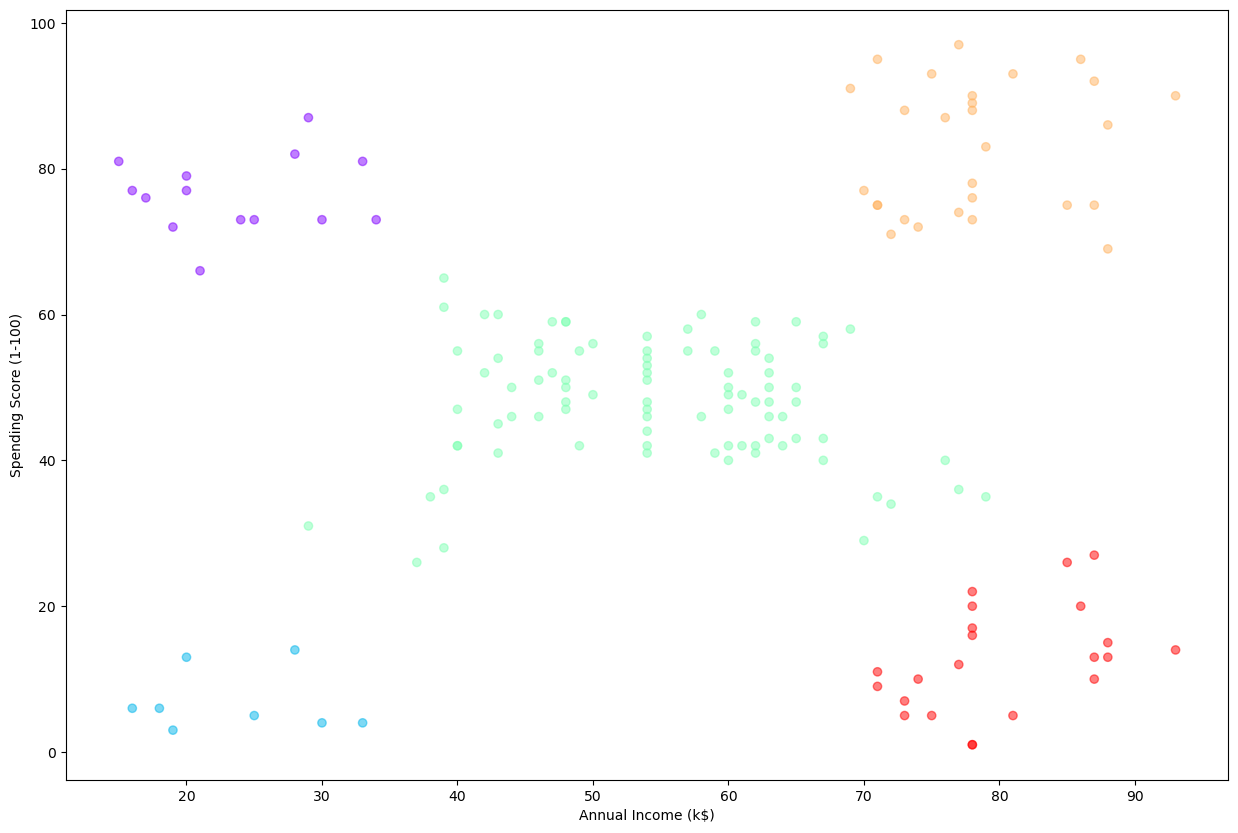

In [37]:
#Plotando o grafico sem os outliers:
#mascara para outlier
mascara = dbscan_labels>=0

#plotando o gráfico
plt.scatter(dados[['Annual Income (k$)']][mascara],dados[['Spending Score (1-100)']][mascara], c=dbscan_labels[mascara], alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


Checando a quantidade de valores que foram classificados como Outliers:

In [38]:
list(mascara).count(False)

38

### 3 - Agrupamento Hierárquico

In [39]:
# Criando o modelo
# linkage = ‘ward’ minimizes the variance of the clusters being merged.
model = AgglomerativeClustering(n_clusters=5,linkage='ward')

model.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])
hierarquico_labels = model.labels_
hierarquico_labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

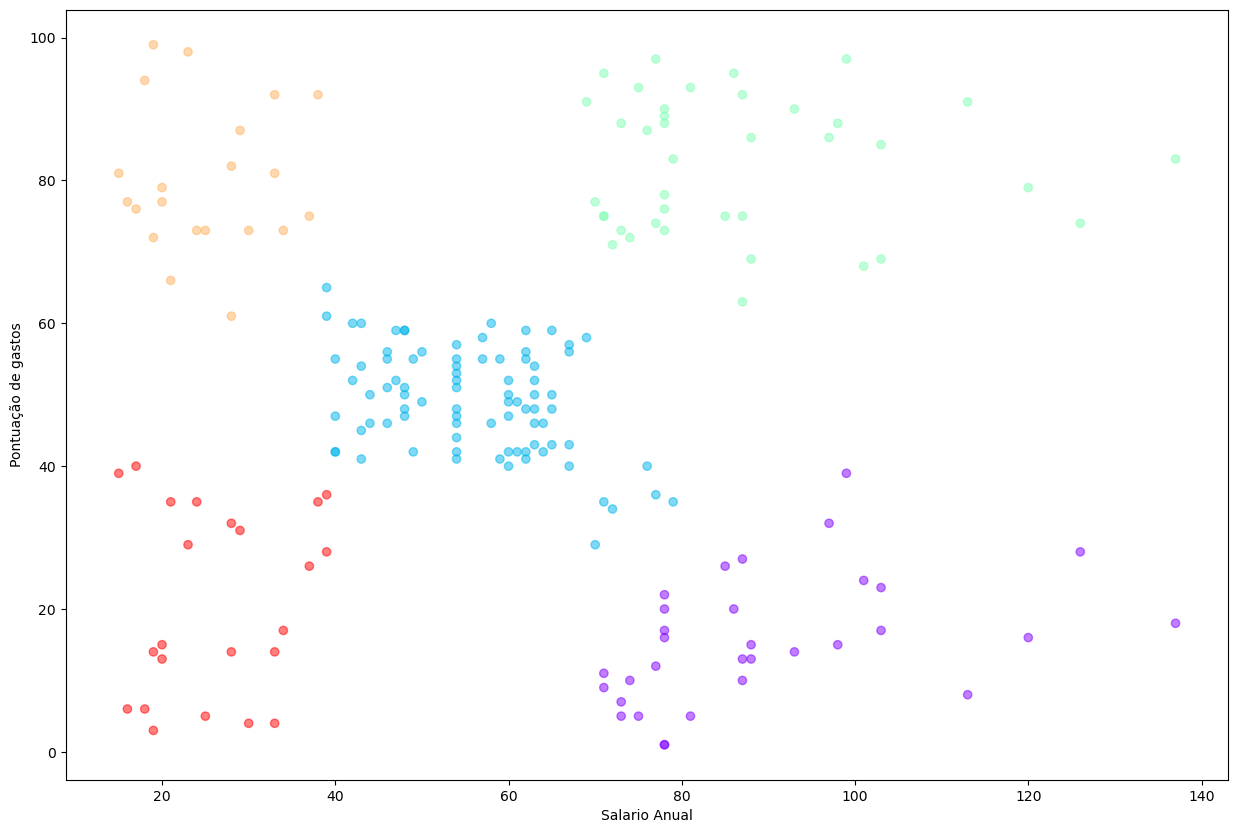

In [40]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=hierarquico_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides

plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

Visualizando o dendrograma

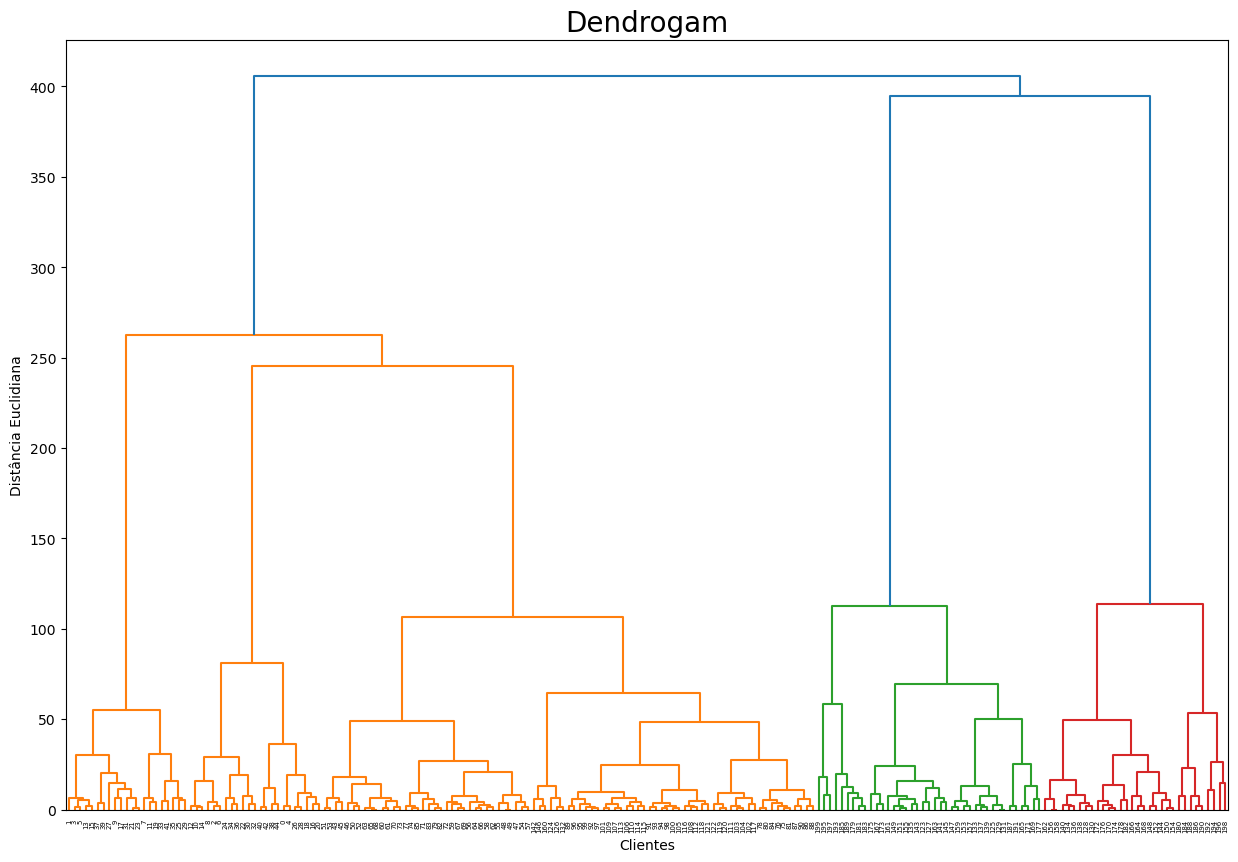

In [41]:
dendrogram = sch.dendrogram(sch.linkage(dados[['Annual Income (k$)','Spending Score (1-100)']], method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Clientes')
plt.ylabel('Distância Euclidiana')
plt.show()

### 4 - Avaliando o Desempenho dos Algoritmos

(a) Usando o **Adjusted Rand Index**

Comparação entre K-Means e Agrupamento Hierarquico:

In [42]:
adjusted_rand_score(kmeans_labels,hierarquico_labels)

0.9419606318143182

Comparação entre K-Means e DBSCAN:

In [43]:
adjusted_rand_score(kmeans_labels,dbscan_labels)

0.7151933782093212

Comparação entre Agrupamento Hierarquico e o DBSCAN:

In [44]:
adjusted_rand_score(hierarquico_labels,dbscan_labels)

0.7753880543390358

Percebemos que o KMeans e o Agrupamento hierarquico para esse caso conseguiram resultados mais próximos um do outro do que quando comparados com o DBSCAN

(b) Avaliando a métrica de **Silhouette**

KMEANS:

In [45]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],kmeans_labels)

0.553931997444648

DBSCAN:

In [46]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],dbscan_labels)

0.36328873885121793

Agrupamento Hierarquico:

In [47]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],hierarquico_labels)

0.5529945955148897

Para mais informações de aplicação de técnicas de Agrupamento na segmentação de imagens, https://experiencor.github.io/segmentation.html